In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def predict(file_path, N, rand, visual = False):
    '''
        file_path: the path of data file
        N: the time lagged
        rand: the random status
    '''

    # Load stock data from CSV file
    df = pd.read_csv(file_path)
    df = df[['开盘']]

    # Find the wanted column
    for i in range(len(df['开盘'])):
        df['开盘'][i] = float(df['开盘'][i].replace(",",""))
    

    # Create lagged features for the previous time
    X_col = []
    for i in range(1, N+1):
        col = f'lag_{i}'
        X_col.append(col)
        df[col] = df['开盘'].shift(i)

    # Drop rows with NaN values resulting from creating lagged features
    df = df.dropna()

    # Define X (features) and y (target)
    X = df[X_col]
    y = df['开盘']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rand)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    # Visualize the actual vs. predicted values
    if visual == True:
        print(f'Mean Squared Error: {mse}')
        plt.scatter(y_test.index, y_test, color='black', label='Actual Values', s = 10)
        plt.scatter(y_test.index, y_pred, color='red', label='Predicted Values', s = 5)
        plt.xlabel('Index')
        plt.ylabel('Stock Values')
        plt.legend()
        plt.show()
    
    return mse


Mean Squared Error: 33931.59107133012


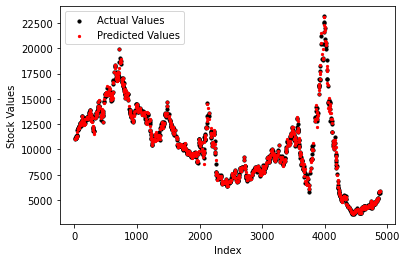

Random Status:  12


In [155]:
file_path = '富时中国A50指数历史数据_Daily.csv'
N = 14

maxMSE = predict(file_path, N, 1)
maxRand = 1
for rand in range(1, 20):
    mse = predict(file_path, N, rand)
    if mse < maxMSE:
        maxMSE = mse
        maxRand = rand

predict(file_path, N, maxRand, visual = True)
print("Random Status: ", maxRand)

Mean Squared Error: 36219.26789706217


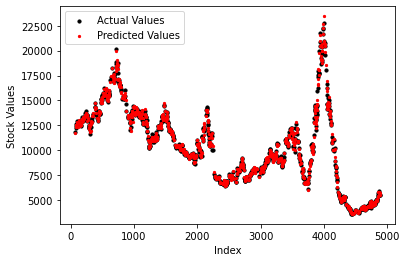

Random Status:  4


In [156]:
file_path = '富时中国A50指数历史数据_Daily.csv'
N = 14*5

maxMSE = predict(file_path, N, 1)
maxRand = 1
for rand in range(1, 20):
    mse = predict(file_path, N, rand)
    if mse < maxMSE:
        maxMSE = mse
        maxRand = rand

predict(file_path, N, maxRand, visual = True)
print("Random Status: ", maxRand)

Mean Squared Error: 34897.286116886105


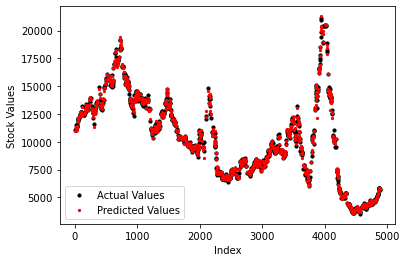

Random Status:  5


In [160]:
file_path = '富时中国A50指数历史数据_Daily.csv'
N = 7

maxMSE = predict(file_path, N, 1)
maxRand = 1
for rand in range(1, 20):
    mse = predict(file_path, N, rand)
    if mse < maxMSE:
        maxMSE = mse
        maxRand = rand

predict(file_path, N, maxRand, visual = True)
print("Random Status: ", maxRand)

C:\Users\zhaxi\AppData\Local\Temp/ipykernel_22520/4077184700.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['开盘'][i] = float(df['开盘'][i].replace(",",""))


Mean Squared Error: 116858.0826209949


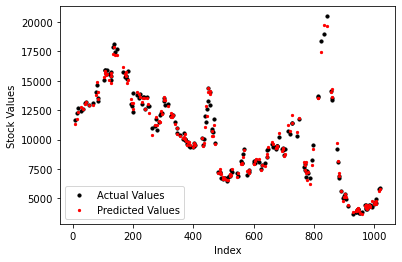

In [81]:
file_path = '富时中国A50指数历史数据_Weekly.csv'
N = 5

maxMSE = predict(file_path, N, 1)
maxRand = 1
for rand in range(1, 20):
    mse = predict(file_path, N, rand)
    if mse < maxMSE:
        maxMSE = mse
        maxRand = rand

predict(file_path, N, maxRand, visual = True)
print("Random Status: ", maxRand)

Mean Squared Error: 126337.10213036856


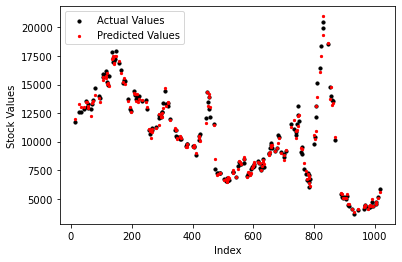

Random Status:  8


In [161]:
file_path = '富时中国A50指数历史数据_Weekly.csv'
N = 14

maxMSE = predict(file_path, N, 1)
maxRand = 1
for rand in range(1, 20):
    mse = predict(file_path, N, rand)
    if mse < maxMSE:
        maxMSE = mse
        maxRand = rand

predict(file_path, N, maxRand, visual = True)
print("Random Status: ", maxRand)